<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab5_2_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Student_data.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# Виведення перших 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196        

In [47]:
# Розмір датасету та типи даних
print("\nРозмір датасету:")
print(df.shape)
print("\nТипи даних:")
print(df.dtypes)


Розмір датасету:
(2392, 15)

Типи даних:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [48]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())


Перевірка на пропущені значення:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [49]:
# Заповнення пропусків середнім значенням
df.fillna(df.mean(), inplace=True)
print("\nПісля заповнення пропусків:")
print(df.isnull().sum())


Після заповнення пропусків:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [50]:
# Перевірка на дублікати
duplicates = df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")


Кількість дублікатів: 0


In [51]:
# Виведення описової статистики
print("\nОписова статистика:")
print(df.describe())


Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971   

In [58]:
# Визначення задачі: регресія чи класифікація
target = 'Age'

if df[target].nunique() <= 2:
    print("\nЗадача: класифікація")
else:
    print("\nЗадача: регресія")



Задача: регресія


In [59]:
# Розділення даних на ознаки та цільову змінну
X = df.drop(columns=[target])
y = df[target]

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Побудова 3 моделей
print("\nМоделі для оцінки:")

# Лінійна регресія
if df[target].nunique() > 2:
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    score_lr = model_lr.score(X_test, y_test)
    print(f"Лінійна регресія: {score_lr}")

# Класифікація (SVM, RandomForest) для класифікації
else:
    model_svc = SVC()
    model_svc.fit(X_train, y_train)
    score_svc = model_svc.score(X_test, y_test)
    print(f"SVC: {score_svc}")

    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)
    score_rf = model_rf.score(X_test, y_test)
    print(f"Random Forest: {score_rf}")



Моделі для оцінки:
Лінійна регресія: -0.020137895218730772


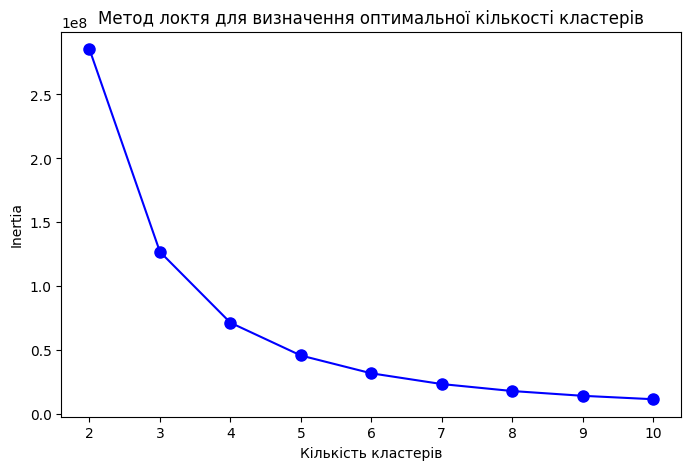

In [61]:
import matplotlib.pyplot as plt
# Визначення оптимальної кількості кластерів методом "локтя"
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізація методу "локтя"
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод локтя для визначення оптимальної кількості кластерів')
plt.show()



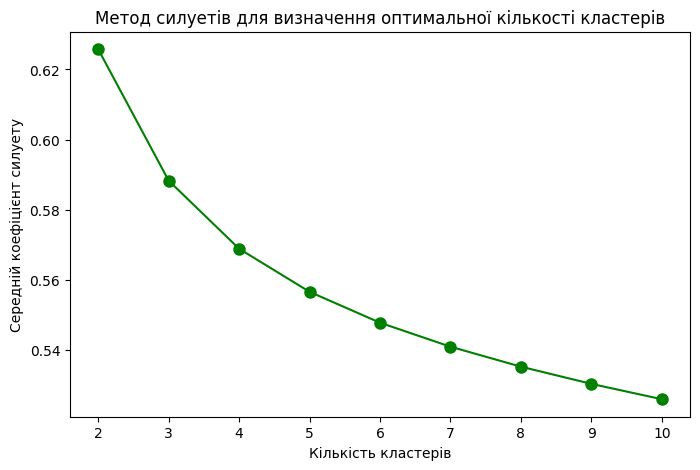

In [62]:
# Візуалізація методу силуетів
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-', markersize=8)
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуету')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.show()


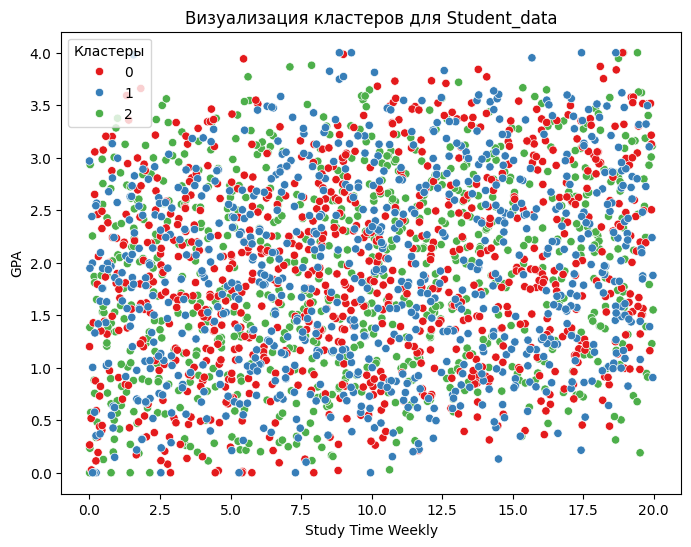

In [64]:

import seaborn as sns
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['StudyTimeWeekly'], y=X['GPA'], hue=clusters, palette='Set1')
plt.title('Визуализация кластеров для Student_data')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.legend(title='Кластеры')
plt.show()


Висновки
Метод ліктя показує, що оптимальна кількість кластерів може бути 3-4. На графіку видно, що крива різко змінює нахил саме в цьому діапазоні.
Метод силуетів, навпаки, вказує, що найкраще розділення даних досягається при 2 кластерах. Це видно з найвищого значення коефіцієнта силуету для 2 кластерів.
На графіку візуалізації кластерів я бачу розподіл студентів за GPA та часом навчання на 3 групи. Але кластери сильно перекриваються, що ускладнює їх чітке розділення.
Загалом, різні методи дають трохи різні результати. Це може означати, що в даних немає дуже чітких природних груп. Можливо, варто спробувати інші методи кластеризації або глибше проаналізувати дані, щоб краще зрозуміти структуру.